# BasicTauHybridSolver

### Imports

In [ ]:
%load_ext autoreload
%autoreload 2


In [6]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_tau_hybrid_solver import BasicTauHybridSolver

### Model Instantiation

Model must include rates, species, and reactions

In [3]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [4]:
model = MichaelisMenten()


### Run Model and plot
Run the model by calling the run function on the model and select solver via 'solver' keyword argument.  if show_labels is 'True' results are returned as a list of dictionaries, where the list index is the trajectory run index, and dictionary keys are comprised of species names and 'time'.  If show_labels is set to 'False' (default), it will return a 3 dimensional numpy array with indices [trajectory][timestep][species]

2019-06-05 19:40:24,879 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


redrawing


KeyboardInterrupt: 

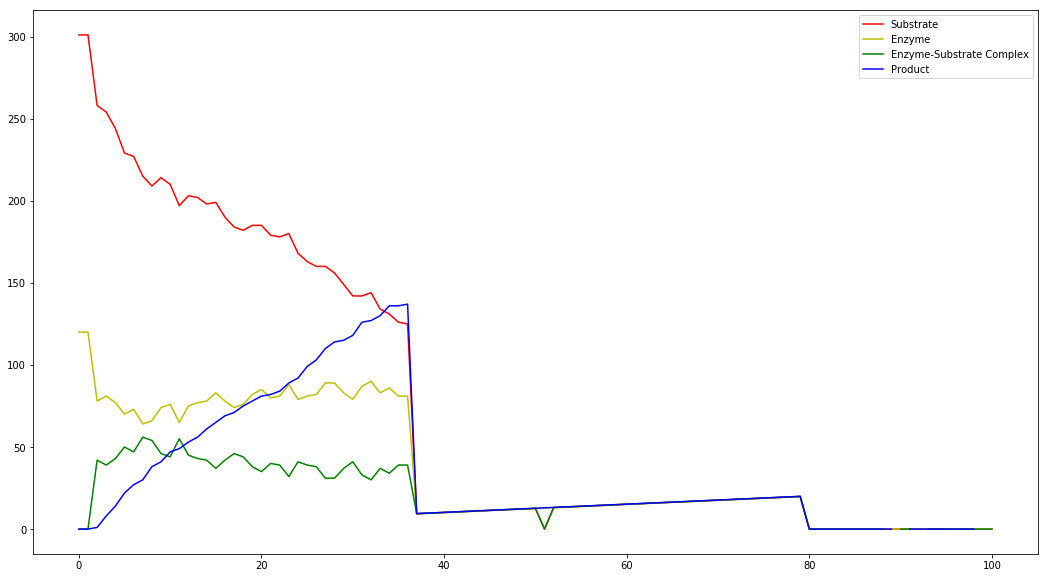

In [5]:
%time tau_results = model.run(solver=BasicTauHybridSolver(), show_labels=True)

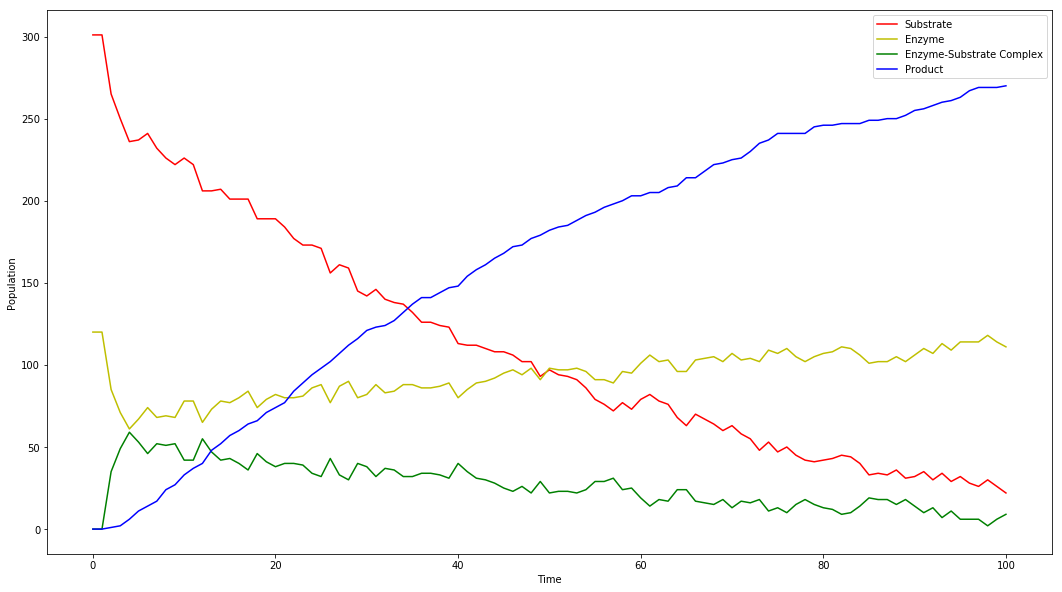

In [5]:
plt.figure(figsize=(18,10))
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(tau_results[0]['time'],tau_results[0]['A'],'r', label='Substrate')
plt.plot(tau_results[0]['time'],tau_results[0]['B'],'y', label='Enzyme')
plt.plot(tau_results[0]['time'],tau_results[0]['C'],'g', label='Enzyme-Substrate Complex')
plt.plot(tau_results[0]['time'],tau_results[0]['D'],'b', label='Product')

plt.plot([0],[11])
plt.legend(loc='best')

2019-06-03 15:54:19,887 - matplotlib.legend - WARNING - No handles with labels found to put in legend.


3


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

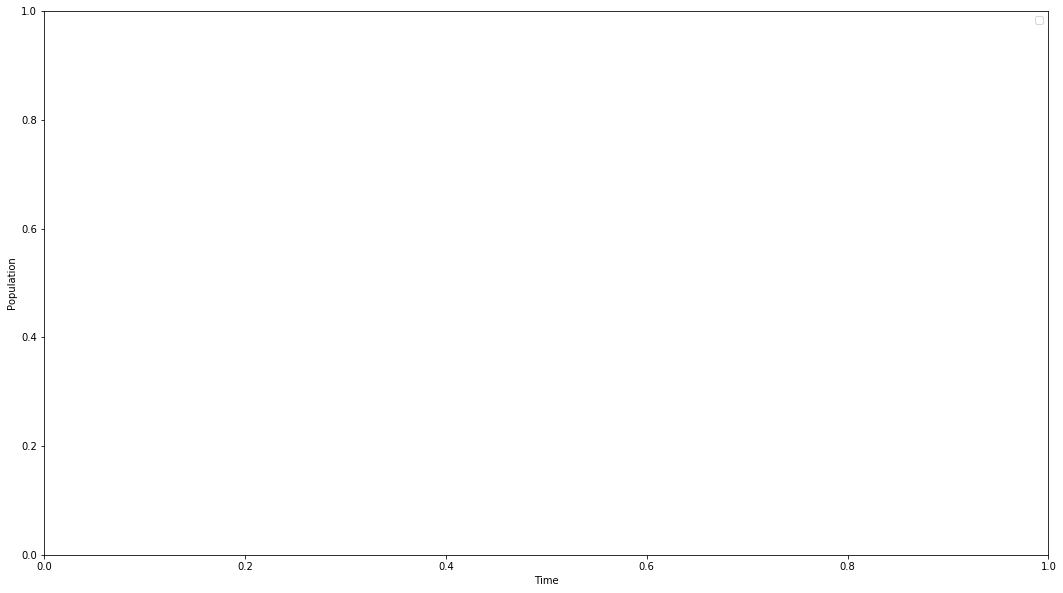

In [5]:
dresults = model.run(solver=BasicTauHybridSolver, show_labels=False)

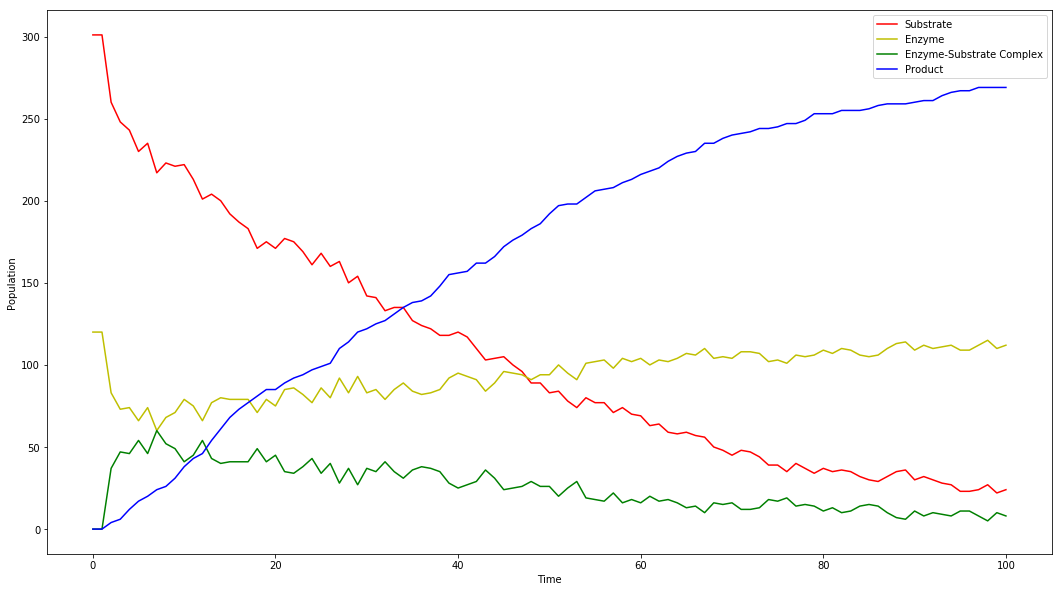

In [10]:
plt.figure(figsize=(18,10))
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(dresults[0][:,0],dresults[0][:,1],'r', label='Substrate')
plt.plot(dresults[0][:,0],dresults[0][:,2],'y', label='Enzyme')
plt.plot(dresults[0][:,0],dresults[0][:,3],'g', label='Enzyme-Substrate Complex')
plt.plot(dresults[0][:,0],dresults[0][:,4],'b', label='Product')


plt.plot([0],[11])
plt.legend(loc='best')